<a href="https://colab.research.google.com/github/KaiWoessner/NFLDataAnalysis/blob/main/SingleGraphs/GameStatsGraphs2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the library for NFL Data
!pip install nfl_data_py

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.2 MB/s eta 0:00:00
  Created wheel for nfl_data_py: filename=nfl_data_py-0.3.1-py3-none-any.whl size=13188 sha256=d0f81e0cffe499369b920a4f322c4700362bc581ec1d2a2d5fb5ed7dcb87884b
  Stored in directory: /root/.cache/pip/wheels/ca/2e/d2/4def312ac7c070e1c0002e91ecc6923481a86c3ebd5b2c5413
Successfully built nfl_data_py


In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import axes
from matplotlib.ticker import FuncFormatter
import numpy as np
from PIL import Image

import nfl_data_py as nfl

#import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from google.colab import drive

drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


In [3]:
stats = nfl.import_pbp_data([2023])
pd.set_option('display.max_columns', None)
stats.head()

2023 done.
Downcasting floats.


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [4]:
run_stats = stats.groupby(["posteam", "run_gap", "run_location"]).size().reset_index(name = "run_count")
run_stats.head()

,posteam,run_gap,run_location,run_count
0,ARI,end,left,33
1,ARI,end,right,40
2,ARI,guard,left,13
3,ARI,guard,right,13
4,ARI,tackle,left,28


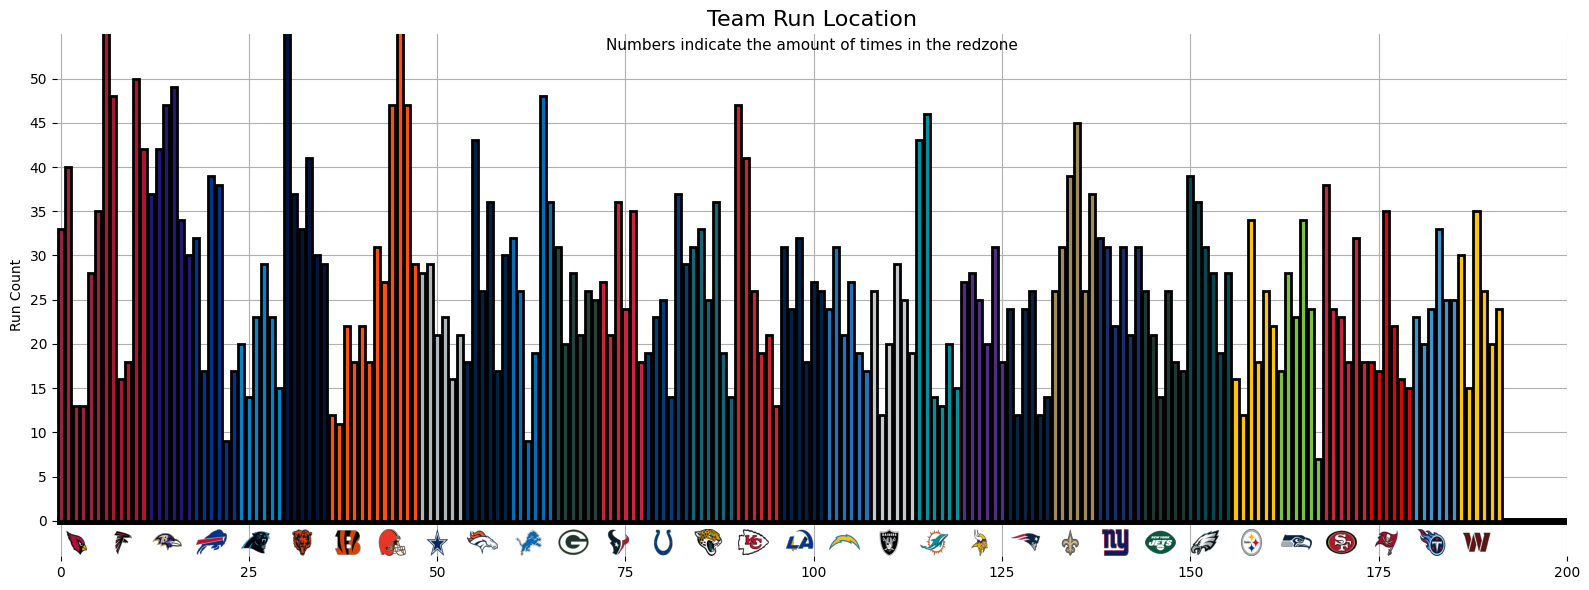

In [5]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in run_stats["posteam"]]

logo_images = []

for team in run_stats["posteam"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(run_stats.index, run_stats["run_count"], width=0.8, color=tm_colors, edgecolor='black', linewidth=2, zorder = 5)

plt.axhline(0, color='black', linewidth = 5)

# Add logo
for i in range(len(run_stats["posteam"])):
    if ((i % 6 == 0)):
      logo_img = logo_images[i]
      plt.imshow(logo_img, extent=[i,i + 4, -4 , -1], aspect='auto', zorder=7)


ax.set_ylabel('Run Count')

# Add a main title
ax.set_title('Team Run Location', fontsize=16)

# Add subtitle
subtitle = 'Numbers indicate the amount of times in the redzone'
plt.text(0.5, 0.97, subtitle, fontsize=11, ha='center', transform=ax.transAxes)


plt.ylim(-4,55)
plt.xlim([-0.5, 200])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
#plt.xticks([])
plt.yticks(np.arange(0,55, 5))

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

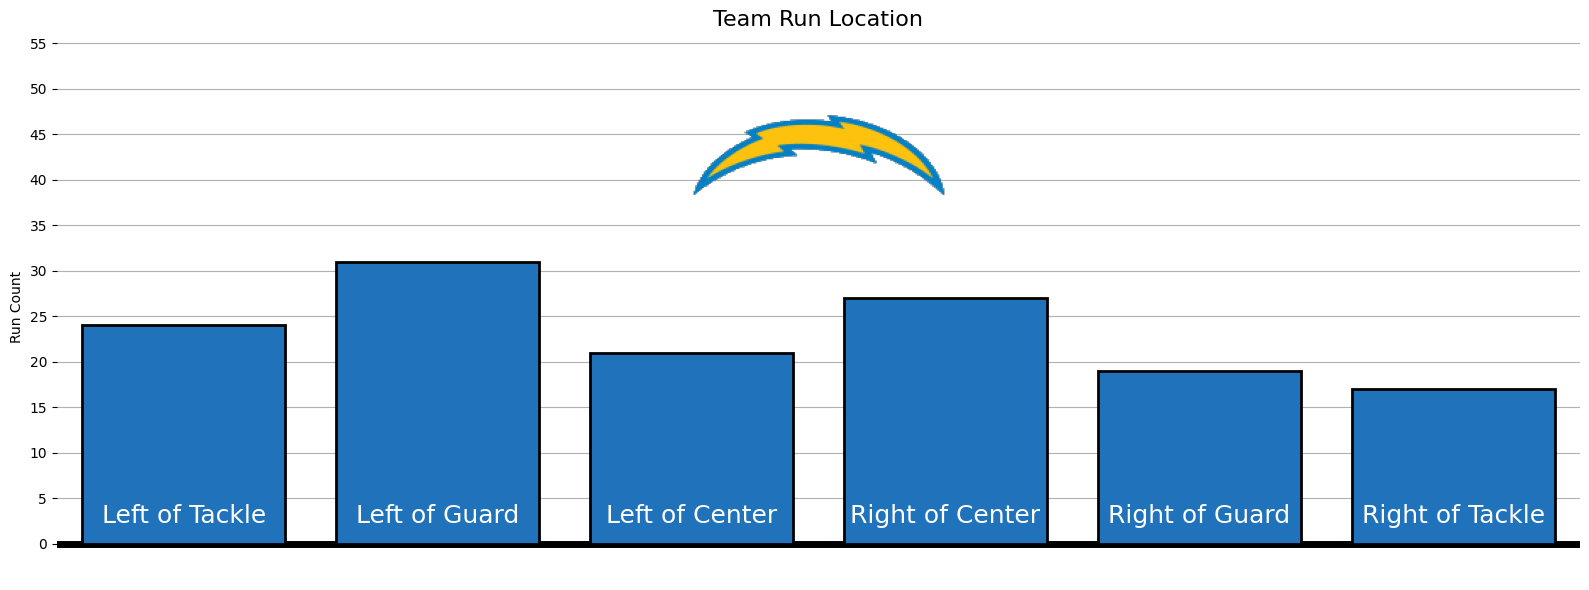

In [6]:
tm = "LAC"

tm_run_stats = run_stats[run_stats["posteam"] == tm].reset_index()

teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_color = teamcolor.get(tm)

logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{tm}.png')  # Adjust the path to your logo images

fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(tm_run_stats.index, tm_run_stats["run_count"], width=0.8, color=tm_color, edgecolor='black', linewidth=2, zorder = 5)

plt.axhline(0, color='black', linewidth = 5)

# Add logo
plt.imshow(logo_img, extent=[2,3, 35 , 50], aspect='auto', zorder=7)

categories = ["Left of Tackle", "Left of Guard", "Left of Center", "Right of Center","Right of Guard","Right of Tackle"]
for i in range(6):
  plt.text(i, 3, categories[i], ha='center', va='center', color='w', fontsize=18, zorder = 10)

ax.set_ylabel('Run Count')

# Add a main title
ax.set_title('Team Run Location', fontsize=16)


plt.ylim(-4,56)
plt.xlim([-0.5, 5.5])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks(np.arange(0,56, 5))

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

In [7]:
stats = nfl.import_pbp_data([2023])
pd.set_option('display.max_columns', None)

2023 done.
Downcasting floats.


In [8]:
# SUCCESS
passing = stats[stats["play_type"] == "pass"]
rushing = stats[stats["play_type"] == "run"]

passing_total = passing.groupby("posteam").size().reset_index(name = "pass_plays")
pass_success = passing.groupby("posteam")["success"].sum().reset_index()

pass_success["pass_success_percent"] = pass_success["success"] / passing_total["pass_plays"] * 100

rushing_total = rushing.groupby("posteam").size().reset_index(name = "run_plays")
rushing_success = rushing.groupby("posteam")["success"].sum().reset_index()

rushing_success["rush_success_percent"] = rushing_success["success"] / rushing_total["run_plays"] * 100

pass_success = pass_success.sort_values("pass_success_percent", ascending=False).reset_index(drop = True)
rushing_success = rushing_success.sort_values("rush_success_percent", ascending=False).reset_index(drop = True)

pass_success = pass_success.rename(columns={"posteam": "team"})
rushing_success = rushing_success.rename(columns={"posteam": "team"})

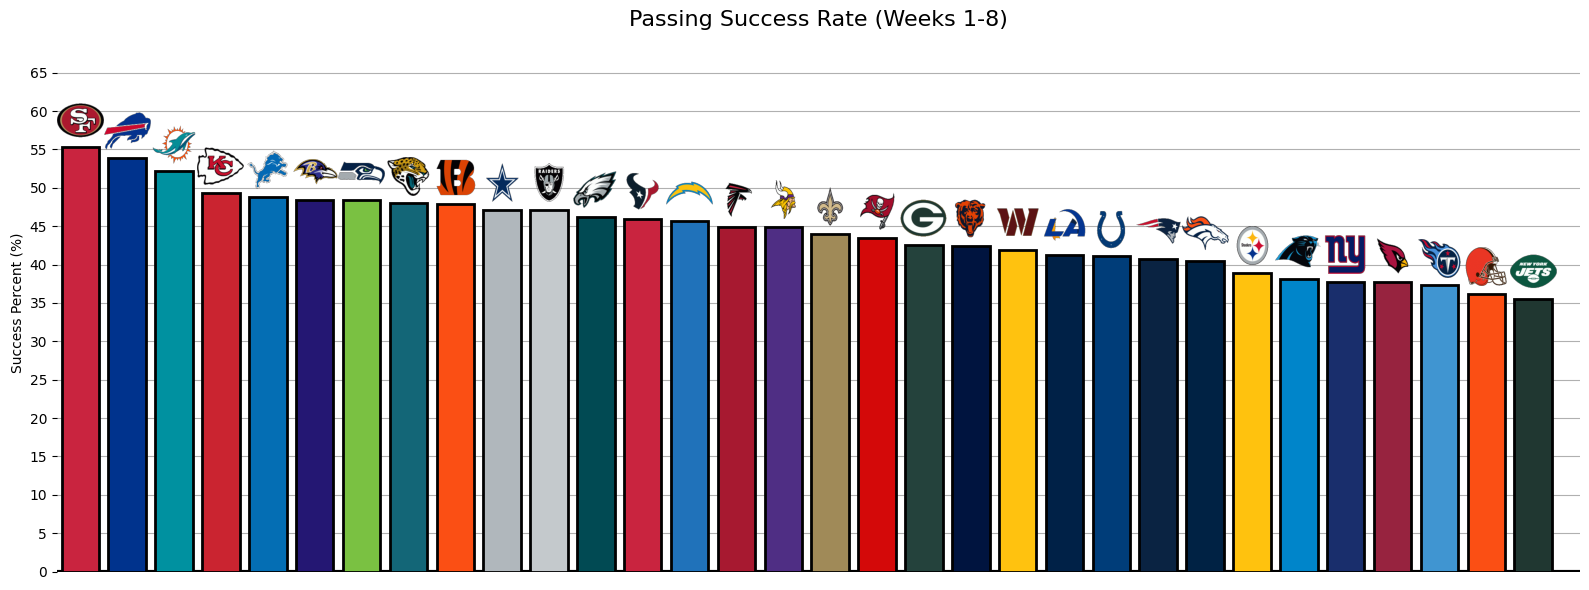

In [9]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in pass_success["team"]]

logo_images = []

for team in pass_success["team"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(pass_success["team"],pass_success["pass_success_percent"] , width=0.8, color=tm_colors, edgecolor='black', linewidth=2, zorder = 5)

# # Add count
# for i in range(len(final_4th["posteam"])):
#    plt.text(i, pass_success["pass_success_percent"][i]-5, int(pass_success["pass_success_percent"][i]), ha='center', va='center', color='w', fontsize=20, zorder = 30)

# Add logo
for i in range(len(pass_success["team"])):

    logo_img = logo_images[i]

    plt.imshow(logo_img, extent=[i-0.5,i + 0.5, pass_success["pass_success_percent"][i] + 1 , pass_success["pass_success_percent"][i] + 6], aspect='auto', zorder=7)


ax.set_ylabel('Success Percent (%)')

# Add a main title
ax.set_title('Passing Success Rate (Weeks 1-8)', fontsize=16)

ax.axhline(y=0, color="k", linewidth=3)

# Add a subtitle
# subtitle = 'Number is the amount of attempts.'
# plt.text(0.5, 0.98, subtitle, fontsize=10, ha='center', transform=ax.transAxes)

plt.ylim([0, 70])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(np.arange(0, 70, 5))
plt.xticks([])

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

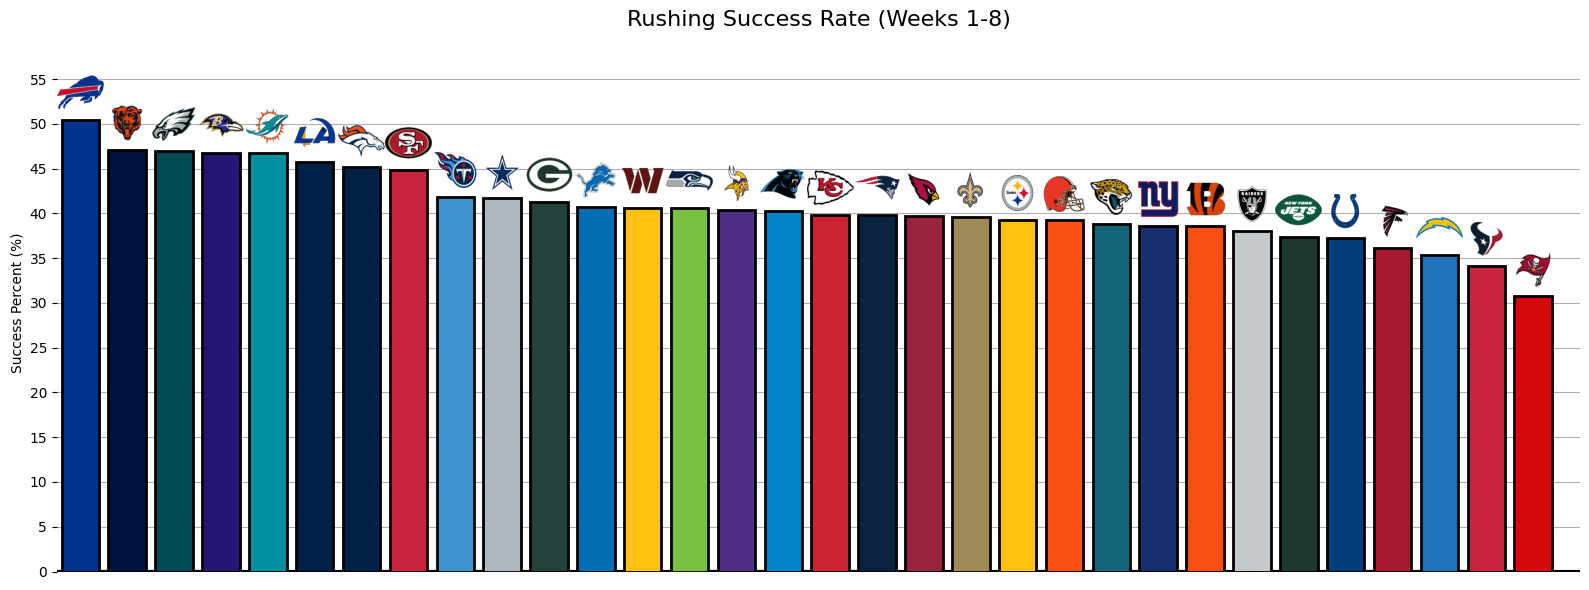

In [10]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in rushing_success["team"]]

logo_images = []

for team in rushing_success["team"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(rushing_success["team"],rushing_success["rush_success_percent"] , width=0.8, color=tm_colors, edgecolor='black', linewidth=2, zorder = 5)

# # Add count
# for i in range(len(final_4th["posteam"])):
#    plt.text(i, pass_success["pass_success_percent"][i]-5, int(pass_success["pass_success_percent"][i]), ha='center', va='center', color='w', fontsize=20, zorder = 30)

# Add logo
for i in range(len(rushing_success["team"])):

    logo_img = logo_images[i]

    plt.imshow(logo_img, extent=[i-0.5,i + 0.5, rushing_success["rush_success_percent"][i] + 1 , rushing_success["rush_success_percent"][i] + 5], aspect='auto', zorder=7)

ax.axhline(y=0, color="k", linewidth=3)

ax.set_ylabel('Success Percent (%)')

# Add a main title
ax.set_title('Rushing Success Rate (Weeks 1-8)', fontsize=16)

# Add a subtitle
# subtitle = 'Number is the amount of attempts.'
# plt.text(0.5, 0.98, subtitle, fontsize=10, ha='center', transform=ax.transAxes)

plt.ylim([0, 60])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(np.arange(0, 60, 5))
plt.xticks([])

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

In [11]:
red_stats = nfl.import_pbp_data([2023])

redzone = red_stats[red_stats["drive_inside20"] == 1.0]
redzone_td = redzone[redzone["touchdown"] == 1.0]

redzone_drives = redzone.groupby("posteam")["drive_real_start_time"].nunique().reset_index()
redzone_tds = redzone_td.groupby("posteam")["touchdown"].size().reset_index()

redzone_tds["redzone_eff"] = redzone_tds["touchdown"] / redzone_drives["drive_real_start_time"] * 100

redzone_tds = redzone_tds.sort_values("redzone_eff", ascending=False).reset_index(drop = True)

redzone_tds = pd.merge(redzone_tds, redzone_drives, on='posteam', how='left')
redzone_tds = redzone_tds.rename(columns={"drive_real_start_time": "redzone_drives"})

2023 done.
Downcasting floats.


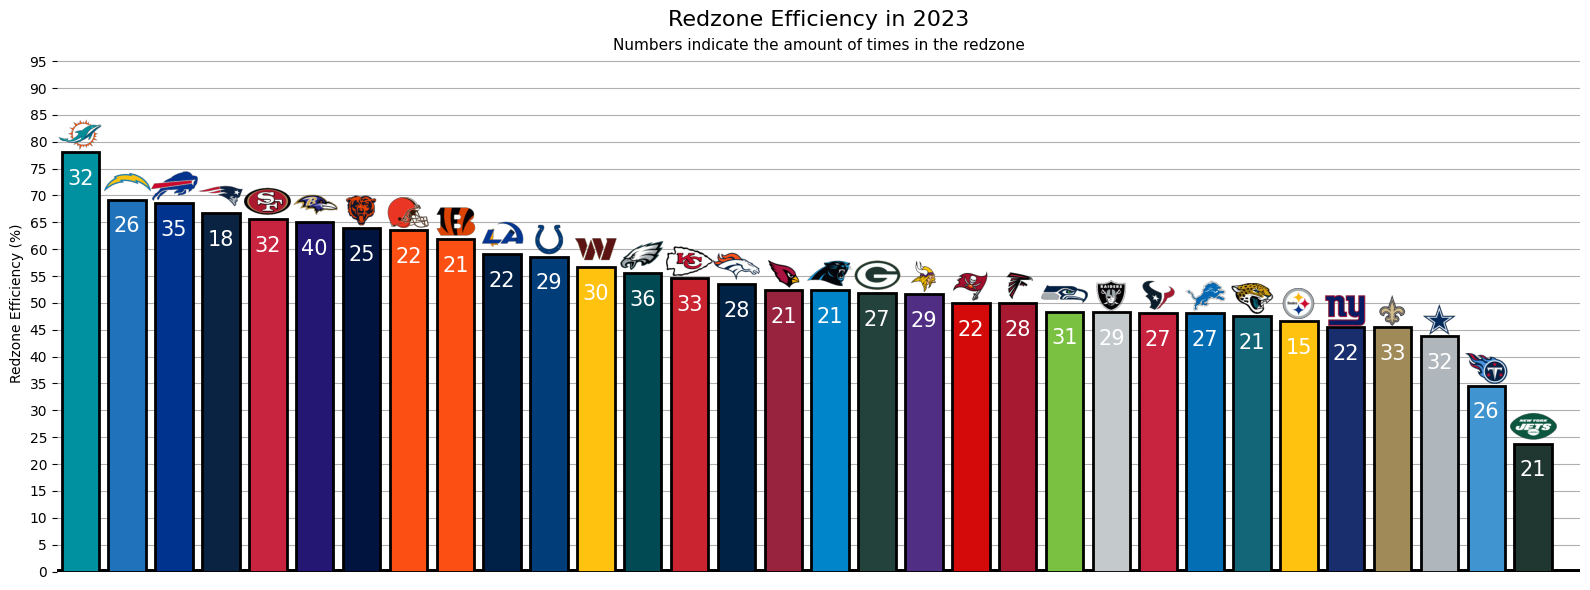

In [12]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in redzone_tds["posteam"]]

logo_images = []

for team in redzone_tds["posteam"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(redzone_tds.index, redzone_tds["redzone_eff"], width=0.8, color=tm_colors, edgecolor='black', linewidth=2, zorder = 5)

plt.axhline(0, color='black', linewidth = 5)

# Add count
for i in range(len(redzone_tds["posteam"])):
    plt.text(i, redzone_tds["redzone_eff"][i] - 5, int(redzone_tds["redzone_drives"][i]), ha='center', va='center', color='w', fontsize=15, zorder = 30)

# Add logo
for i in range(len(redzone_tds["posteam"])):

    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i-0.5,i + 0.5, redzone_tds["redzone_eff"][i] + 0.3 , redzone_tds["redzone_eff"][i] + 6], aspect='auto', zorder=7)


ax.set_ylabel('Redzone Efficiency (%)')

# Add a main title
ax.set_title('Redzone Efficiency in 2023', fontsize=16)

# Add subtitle
subtitle = 'Numbers indicate the amount of times in the redzone'
plt.text(0.5, 0.97, subtitle, fontsize=11, ha='center', transform=ax.transAxes)


plt.ylim(0,100)
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks(np.arange(0,100, 5))

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
pbp_3rd = nfl.import_pbp_data([2023])

pbp_3rd = pbp_3rd[pbp_3rd["down"] == 3.0]
pbp_3rd = pbp_3rd[pbp_3rd["ydstogo"] >= 3]
pbp_3rd = pbp_3rd[pbp_3rd["play_type"] == "pass"]

2023 done.
Downcasting floats.


In [14]:
team_3rd_downs = pbp_3rd.groupby("posteam").size().reset_index(name = "count")
targets_3rd = pbp_3rd.groupby(["receiver", "posteam"]).size().reset_index(name = "targets")

rec_targets = targets_3rd.merge(team_3rd_downs, on="posteam")

rec_targets["target_percent"] = rec_targets["targets"] / rec_targets["count"] * 100


idx = rec_targets.groupby('posteam')['target_percent'].idxmax()

top_receivers = rec_targets.loc[idx].sort_values(by = "target_percent", ascending=False).reset_index()

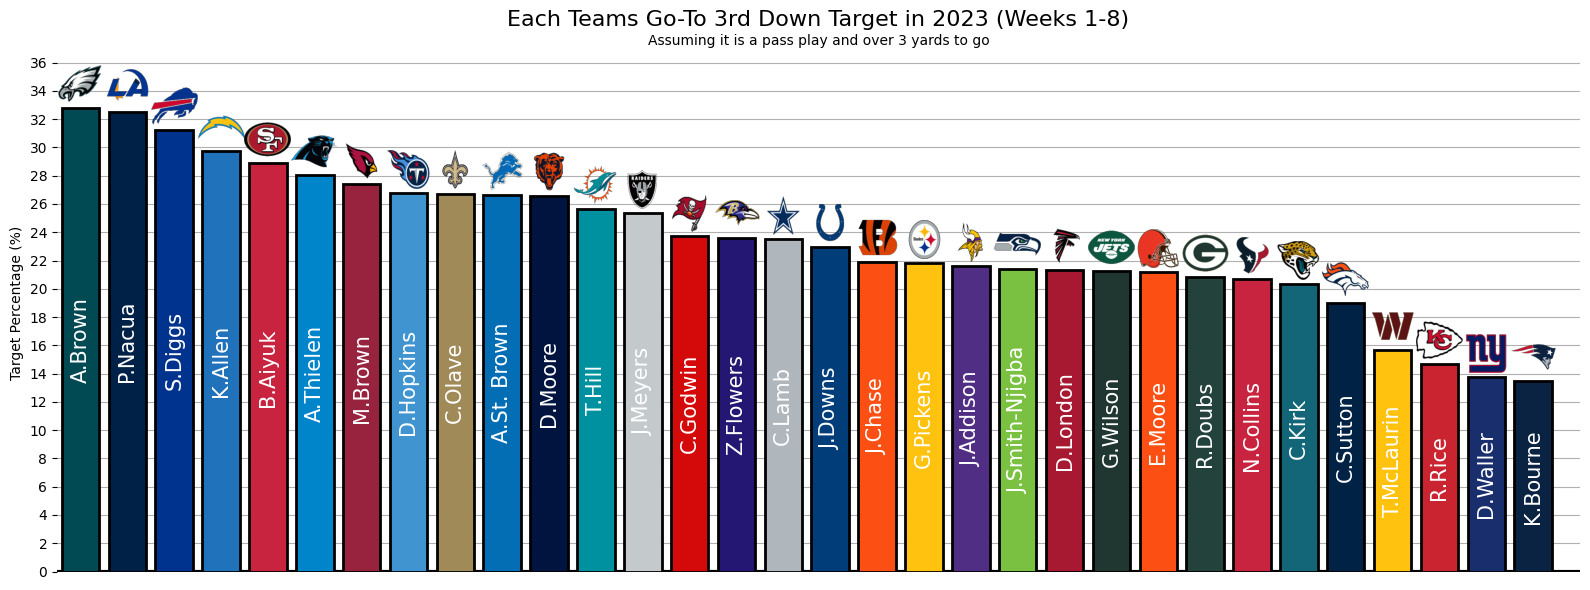

In [15]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in top_receivers["posteam"]]

logo_images = []

for team in top_receivers["posteam"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(top_receivers.index, top_receivers["target_percent"], width=0.8, color=tm_colors, edgecolor='black', linewidth=2, zorder = 5)

plt.axhline(0, color='black', linewidth = 3)

# Add count
for i in range(len(top_receivers["posteam"])):
    plt.text(i, top_receivers["target_percent"][i] / 2, top_receivers["receiver"][i], ha='center', va='center', rotation = 90, color='w', fontsize=15, zorder = 30)

# Add logo
for i in range(len(top_receivers["posteam"])):

    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i-0.5,i + 0.5, top_receivers["target_percent"][i] + 0.3 , top_receivers["target_percent"][i] + 3], aspect='auto', zorder=7)


ax.set_ylabel('Target Percentage (%)')

# Add a main title
ax.set_title('Each Teams Go-To 3rd Down Target in 2023 (Weeks 1-8)', fontsize=16)

# Add a subtitle
subtitle = 'Assuming it is a pass play and over 3 yards to go'
plt.text(0.5, 0.98, subtitle, fontsize=10, ha='center', transform=ax.transAxes)

plt.ylim(0,38)
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks(np.arange(0,38, 2))

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

In [16]:
pbp_3rd = nfl.import_pbp_data(range(2013, 2024))

pbp_3rd = pbp_3rd[pbp_3rd["down"] == 3.0]
pbp_3rd = pbp_3rd[pbp_3rd["play_type"] == "pass"]

2013 done.
2014 done.
2015 done.
2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
2023 done.
Downcasting floats.


In [17]:
team_3rd_downs = pbp_3rd.groupby("posteam").size().reset_index(name = "count")
targets_3rd = pbp_3rd.groupby(["receiver", "posteam"]).size().reset_index(name = "targets")

rec_targets = targets_3rd.merge(team_3rd_downs, on="posteam")

rec_targets["target_percent"] = rec_targets["targets"] / rec_targets["count"] * 100


idx = rec_targets.groupby('posteam')['target_percent'].idxmax()

top_receivers = rec_targets.loc[idx].sort_values(by = "target_percent", ascending=False).reset_index()

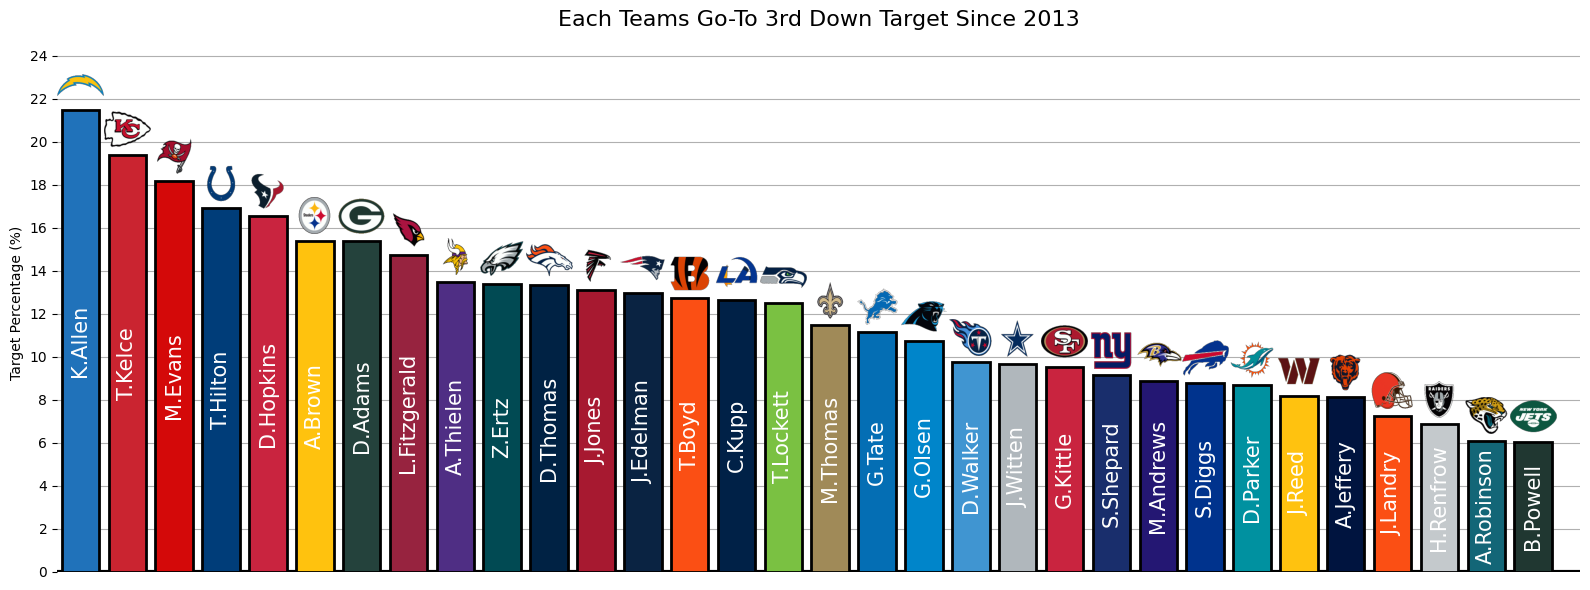

In [18]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in top_receivers["posteam"]]

logo_images = []

for team in top_receivers["posteam"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(top_receivers.index, top_receivers["target_percent"], width=0.8, color=tm_colors, edgecolor='black', linewidth=2, zorder = 5)

plt.axhline(0, color='black', linewidth = 3)

# Add count
for i in range(len(top_receivers["posteam"])):
    plt.text(i, top_receivers["target_percent"][i] / 2, top_receivers["receiver"][i], ha='center', va='center', rotation = 90, color='w', fontsize=15, zorder = 30)

# Add logo
for i in range(len(top_receivers["posteam"])):

    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i-0.5,i + 0.5, top_receivers["target_percent"][i] + 0.3 , top_receivers["target_percent"][i] + 2], aspect='auto', zorder=7)


ax.set_ylabel('Target Percentage (%)')

# Add a main title
ax.set_title('Each Teams Go-To 3rd Down Target Since 2013', fontsize=16)


plt.ylim(0,25)
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks(np.arange(0,25, 2))

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

In [19]:
form_pbp = nfl.import_pbp_data([2023])

2023 done.
Downcasting floats.


In [20]:
form_pbp_group = form_pbp.groupby(["posteam", "offense_formation"])["epa"].sum().reset_index()
play_group = form_pbp.groupby(["posteam","offense_formation"]).size().reset_index(name = "plays")

play_group = play_group[play_group["plays"] >= 30]

form_pbp_group["epa/play"] = form_pbp_group["epa"] / play_group["plays"]

form_pbp_group = form_pbp_group.dropna()
form_pbp_ranked = form_pbp_group.sort_values("epa/play", ascending=False)

best_pbp = form_pbp_ranked.head(10)
worst_pbp = form_pbp_ranked.tail(10)

best_worst_pbp = pd.concat([best_pbp, worst_pbp]).reset_index(drop = True)

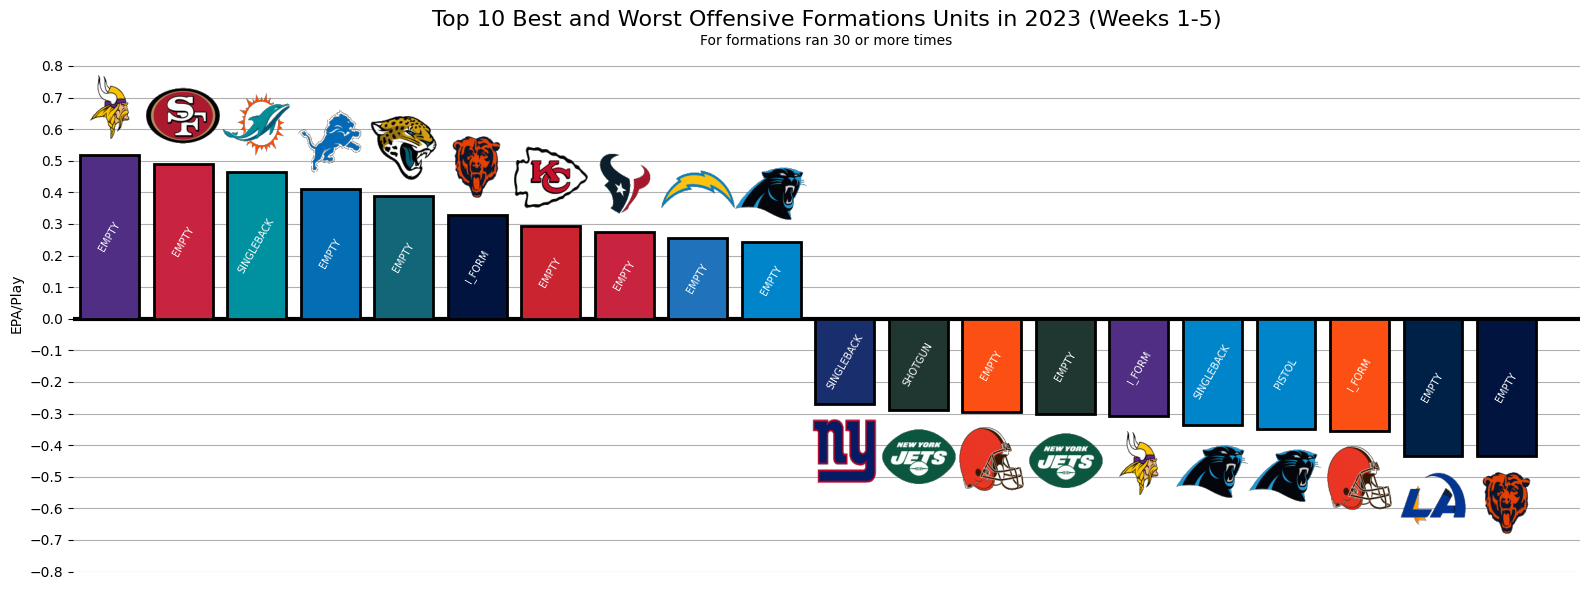

In [21]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in best_worst_pbp["posteam"]]

logo_images = []

for team in best_worst_pbp["posteam"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(best_worst_pbp.index, best_worst_pbp["epa/play"], width=0.8, color=tm_colors, edgecolor='black', linewidth=2, zorder = 5)

plt.axhline(0, color='black', linewidth = 3)

# Add count
for i in range(len(best_worst_pbp["posteam"])):
  if (best_worst_pbp["epa/play"][i] > 0):
    plt.text(i, best_worst_pbp["epa/play"][i] / 2, best_worst_pbp["offense_formation"][i], ha='center', va='center', rotation = 60, color='w', fontsize=7, zorder = 30)
  if (best_worst_pbp["epa/play"][i] < 0):
    plt.text(i, best_worst_pbp["epa/play"][i] / 2, best_worst_pbp["offense_formation"][i], ha='center', va='center', rotation = 60, color='w', fontsize=7, zorder = 30)

# Add logo
for i in range(len(best_worst_pbp["posteam"])):

    logo_img = logo_images[i]

    if (best_worst_pbp["epa/play"][i] > 0):
      plt.imshow(logo_img, extent=[i-0.5,i + 0.5, best_worst_pbp["epa/play"][i] + 0.05 , best_worst_pbp["epa/play"][i] + 0.25], aspect='auto', zorder=7)
    if (best_worst_pbp["epa/play"][i] < 0):
      plt.imshow(logo_img, extent=[i-0.5,i + 0.5, best_worst_pbp["epa/play"][i] - 0.25 , best_worst_pbp["epa/play"][i] - 0.05], aspect='auto', zorder=7)


ax.set_ylabel('EPA/Play')

# Add a main title
ax.set_title('Top 10 Best and Worst Offensive Formations Units in 2023 (Weeks 1-5)', fontsize=16)

# Add a subtitle
subtitle = 'For formations ran 30 or more times'
plt.text(0.5, 0.98, subtitle, fontsize=10, ha='center', transform=ax.transAxes)

plt.ylim(-0.8,0.9)
plt.xlim([-0.5, 20])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks(np.arange(-0.8,0.9, 0.1))

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

In [22]:
pass_ngs = nfl.import_ngs_data("passing", [2023])
rec_ngs = nfl.import_ngs_data("receiving", [2023])

pass_ngs = pass_ngs[pass_ngs["week"] == 0]
rec_ngs = rec_ngs[rec_ngs["week"] == 0]

In [23]:
# Target Percentage

pd.set_option('display.max_rows', None)

attempts = pass_ngs.groupby("team_abbr")["attempts"].sum().reset_index()
attempts = attempts.sort_values(by = "team_abbr")

target_ngs = rec_ngs.sort_values(by = ["team_abbr", "targets"], ascending = [True, False])

target_ngs = target_ngs.groupby(by='team_abbr').head(2).sort_values(by='team_abbr')
target_ngs = target_ngs[["player_short_name","team_abbr", "targets"]].reset_index(drop=True)

attempts = pd.concat([attempts]*2)
attempts = attempts.sort_values(by='team_abbr').reset_index(drop=True)


target_ngs["target_percent"] = target_ngs["targets"] / attempts["attempts"] * 100
target_ngs["Rank"] = ["rec1", "rec2"]*32

target_ngs["team_abbr"].replace('LAR', 'LA', inplace=True)

target_ngs_piv = target_ngs.pivot(index='team_abbr', columns='Rank', values=["player_short_name", "target_percent"]).reset_index()

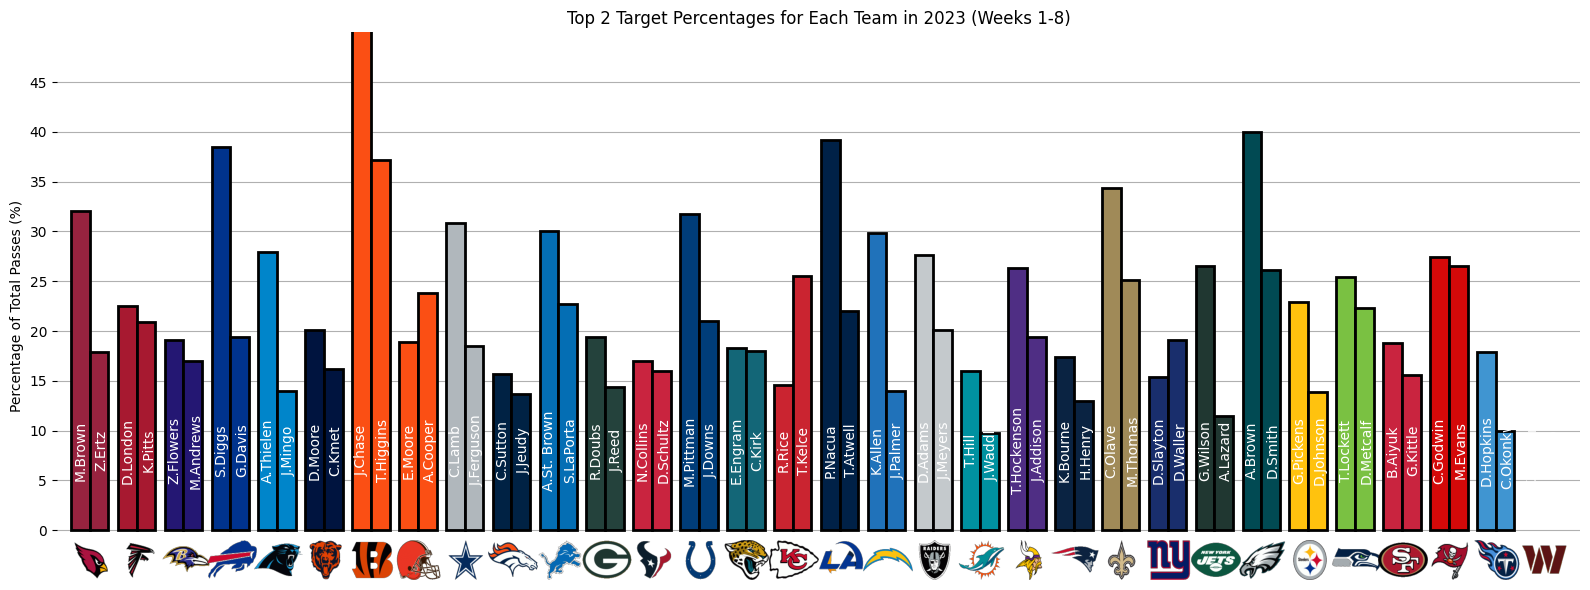

In [24]:
# Get the list of teams and their corresponding index
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in target_ngs_piv["team_abbr"]]

logo_images = []

for team in target_ngs_piv["team_abbr"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

# Plot the grouped bar chart
width = 0.4  # Width of each bar
fig, ax = plt.subplots(figsize=(16, 6))

for i, reciever in enumerate(['rec1', 'rec2']):
    recieve = target_ngs_piv["target_percent"][reciever]
    ax.bar([pos + i * width for pos in range(len(target_ngs_piv["team_abbr"]))], recieve, width=width, label=reciever, color=tm_colors, edgecolor='black', linewidth=2, zorder=5)

for i in range(len(target_ngs_piv["team_abbr"])):
  plt.text(i, 8, target_ngs_piv["player_short_name"]["rec1"][i], ha='center', va='center', color='w', rotation=90, fontsize=10, zorder = 10)
  plt.text(i+0.45, 8, target_ngs_piv["player_short_name"]["rec2"][i], ha='center', va='center', color='w', rotation=90, fontsize=10, zorder = 10)

for i in range(len(target_ngs_piv["team_abbr"])):

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i- 0.3,i + 0.75, -5 ,-1], aspect='auto', zorder=3)


ax.set_ylabel('Percentage of Total Passes (%)')
ax.set_title('Top 2 Target Percentages for Each Team in 2023 (Weeks 1-8)')

plt.ylim([-5, 50])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(range(0, 50, 5))


ax.grid(zorder=0)
ax.xaxis.set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

In [25]:
# Reception Percentage

pd.set_option('display.max_rows', None)

complete = pass_ngs.groupby("team_abbr")["completions"].sum().reset_index()
complete = complete.sort_values(by = "team_abbr")

recs_ngs = rec_ngs.sort_values(by = ["team_abbr", "receptions"], ascending = [True, False])

recs_ngs = recs_ngs.groupby(by='team_abbr').head(2).sort_values(by='team_abbr')
recs_ngs = recs_ngs[["player_short_name","team_abbr", "receptions"]].reset_index(drop=True)

complete = pd.concat([complete]*2)
complete = complete.sort_values(by='team_abbr').reset_index(drop=True)

recs_ngs["rec_percent"] = recs_ngs["receptions"] / complete["completions"] * 100
recs_ngs["Rank"] = ["rec1", "rec2"]*32

recs_ngs["team_abbr"].replace('LAR', 'LA', inplace=True)

rec_ngs_piv = recs_ngs.pivot(index='team_abbr', columns='Rank', values=["player_short_name", "rec_percent"]).reset_index()

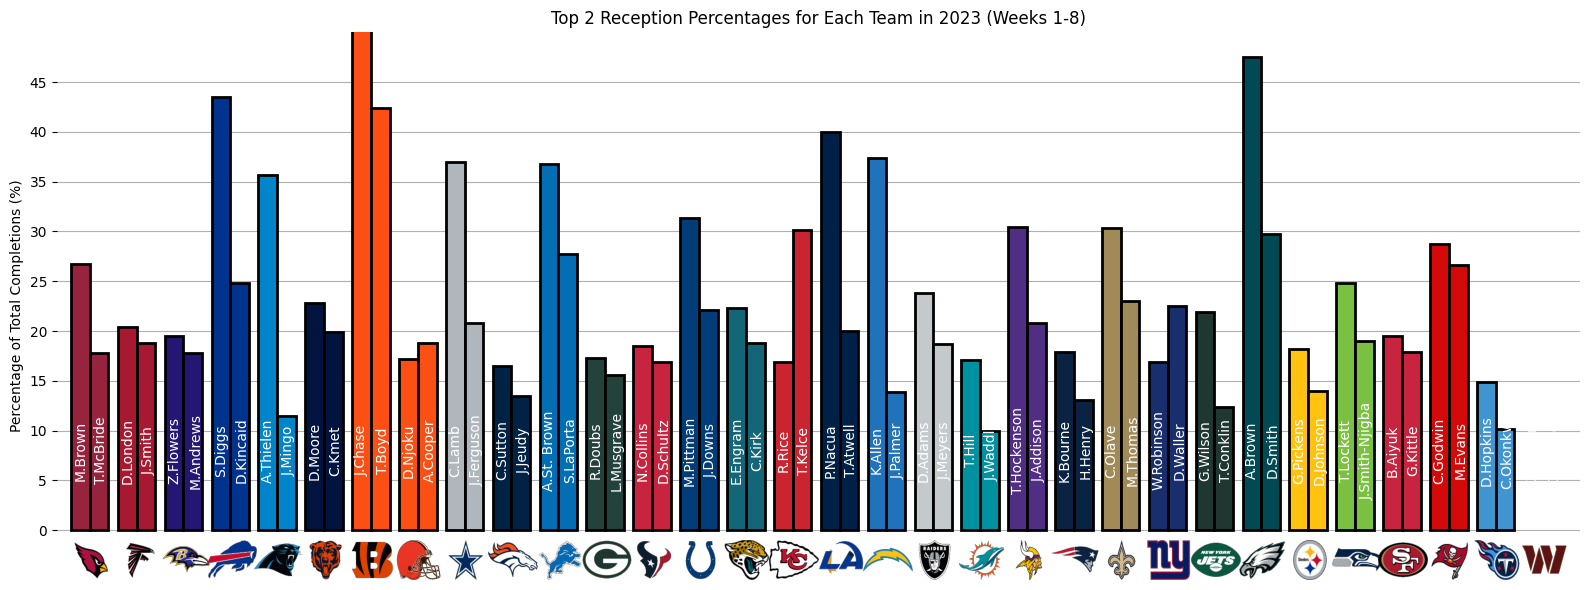

In [26]:
# Get the list of teams and their corresponding index
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in rec_ngs_piv["team_abbr"]]

logo_images = []

for team in rec_ngs_piv["team_abbr"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

# Plot the grouped bar chart
width = 0.4  # Width of each bar
fig, ax = plt.subplots(figsize=(16, 6))

for i, reciever in enumerate(['rec1', 'rec2']):
    recieve = rec_ngs_piv["rec_percent"][reciever]
    ax.bar([pos + i * width for pos in range(len(rec_ngs_piv["team_abbr"]))], recieve, width=width, label=reciever, color=tm_colors, edgecolor='black', linewidth=2, zorder=5)

for i in range(len(target_ngs_piv["team_abbr"])):
  plt.text(i, 8, rec_ngs_piv["player_short_name"]["rec1"][i], ha='center', va='center', color='w', rotation=90, fontsize=10, zorder = 10)
  plt.text(i+0.45, 8, rec_ngs_piv["player_short_name"]["rec2"][i], ha='center', va='center', color='w', rotation=90, fontsize=10, zorder = 10)

for i in range(len(rec_ngs_piv["team_abbr"])):

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i- 0.3,i + 0.75, -5 ,-1], aspect='auto', zorder=3)


ax.set_ylabel('Percentage of Total Completions (%)')
ax.set_title('Top 2 Reception Percentages for Each Team in 2023 (Weeks 1-8)')

plt.ylim([-5, 50])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(range(0, 50, 5))


ax.grid(zorder=0)
ax.xaxis.set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

In [57]:
epa = nfl.import_pbp_data([2023])

# Remove Garbage Time (Comment out if not used)
#epa = epa[(epa['wp'] >= .25) & (epa['wp'] <= .975)]

# Copy data
new_epa = epa.copy()

# Create Defensive EPA
new_epa['def_epa'] = -epa['epa']

epa = new_epa

team_epa = pd.DataFrame()

# OFFENSE
off_plays = epa.groupby("posteam").size().reset_index(name = "off_plays")
team_epa = epa.groupby("posteam")["epa"].sum().reset_index()

team_epa["off_epa"] = team_epa["epa"] / off_plays["off_plays"]

# DEFENSE
def_plays = epa.groupby("defteam").size().reset_index(name = "def_plays")
def_epa = epa.groupby("defteam")["def_epa"].sum().reset_index()

team_epa["def_epa"] = def_epa["def_epa"] / def_plays["def_plays"]

team_epa = team_epa.drop("epa", axis=1)

2023 done.
Downcasting floats.


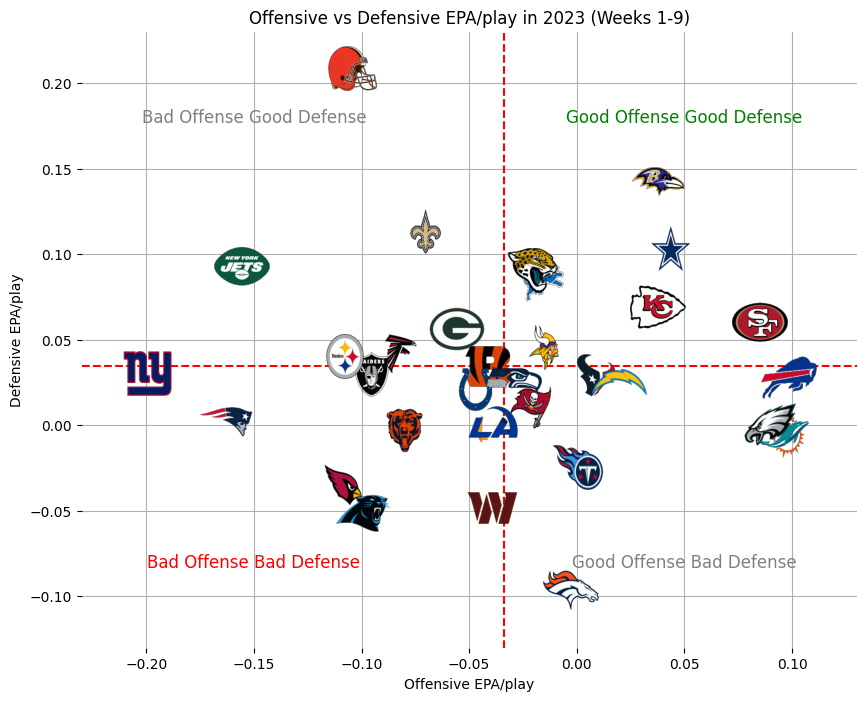

In [59]:
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot with markers replaced by logos

logo_images = []

for team in team_epa["posteam"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

for i in range(len(team_epa["posteam"])):
    x, y = team_epa["off_epa"][i], team_epa["def_epa"][i]

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[x-0.013, x+0.013, y-0.013, y+0.013], aspect='auto', zorder=3)

# Mean lines
mean_x = np.mean(team_epa["off_epa"])
mean_y = np.mean(team_epa["def_epa"])

plt.axhline(mean_y, color='red', linestyle='--', label='Mean')
plt.axvline(mean_x, color='red', linestyle='--', label='Mean')

plt.text(0.05, 0.18, 'Good Offense Good Defense', fontsize=12, ha='center', va='center', color= "g")
plt.text(-0.15, 0.18, 'Bad Offense Good Defense', fontsize=12, ha='center', va='center', color= "0.5")
plt.text(-0.15, -0.08, 'Bad Offense Bad Defense', fontsize=12, ha='center', va='center', color= "r")
plt.text(0.05, -0.08, 'Good Offense Bad Defense', fontsize=12, ha='center', va='center', color= "0.5")

plt.xlabel('Offensive EPA/play')
plt.ylabel('Defensive EPA/play')
plt.title('Offensive vs Defensive EPA/play in 2023 (Weeks 1-9)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(True)

plt.ylim(-0.13, 0.23)
plt.xlim(-0.23,0.13)

plt.show()